# Content
## Supervised Learning
### Classification and Regression Overview
- Definition and Explaination
- Generalization, overfitting and underfitting
### Algorithms
- Classification
    - Example
    - Real World Problem
- Regression
    - Example
    - Real World Problem
### K-Neighbors Algorithm
- K-Neighbors Classification
    - Applying K-Neighbors Classifier on Example
    - Analyzing K-NeighborsClassifier
- K-Neighbors Regression
    - Applying K-Neighbors Regression on Example
    - Analyzing K-NeighborsRegressor
    
Disadvantage: prediction being slow and its inability to handle many features

### Linear Models
- Linear Models for Regression
    - Ordinary Least Square (OLS)
        - Disadvantage: can't control Complexity
    - Ridge Regression

# Supervised Learning
supervised learning is used whenever we want to predict a certain
outcome from a given input, and we have examples of input/output pairs. We build a machine learning model from these input/output pairs, which comprise our training set. Our goal is to make accurate predictions for new, never-before-seen data. Supervised learning often requires human effort to build the training set, but afterward automates and often speeds up an otherwise laborious or infeasible task.

## Classification and Regression
### Classification
In classification, the goal is to predict a class label, which is a choice from a predefined list of possibilities

example: Binary classification

In binary classification we often speak of one class being the posi‐
tive class and the other class being the negative class. Here, positive
doesn’t represent having benefit or value, but rather what the object
of the study is. So, when looking for spam, “positive” could mean
the spam class. Which of the two classes is called positive is often a
subjective matter, and specific to the domain.

### Regression
For regression tasks, the goal is to predict a continuous number, or a floating-point number in programming terms (or real number in mathematical terms).

### Generalization,Overfitting and Underfitting
Overfitting
occurs when you fit a model too closely to the particularities of the training set and
obtain a model that works well on the training set but is not able to generalize to new
data. On the other hand, if your model is too simple—say, “Everybody who owns a
house buys a boat”—then you might not be able to capture all the aspects of and vari‐
ability in the data, and your model will do badly even on the training set. Choosing
too simple a model is called underfitting.

## Supervised Machine Learning Algorithms
We will use several datasets to illustrate the different algorithms. Some of the datasets will be small and synthetic (meaning made-up), designed to highlight particular aspects of the algorithms. Other datasets will be large, real-world examples

In [2]:
# Importing Used Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import sklearn

## Classification Example
An example of a synthetic two-class classification dataset is the forge dataset

X.shape: (26, 2)


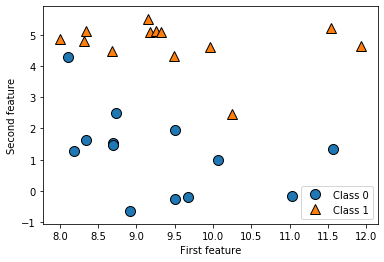

In [3]:
# generate dataset
X, y = mglearn.datasets.make_forge()
# plot dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

## Real-World problem

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [5]:
# Meet the Data
print("Shape of cancer data: {}".format(cancer.data.shape))
# The dataset consists of 569 data points, with 30 features each

print("Sample counts per class:\n{}".format(
{n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))
# Of these 569 data points, 212 are labeled as malignant and 357 as benign

Shape of cancer data: (569, 30)
Sample counts per class:
{'malignant': 212, 'benign': 357}


In [6]:
#Make an iterator that aggregates elements from each of the iterables. Returns an iterator of tuples, where the i-th tuple contains the i-th element from each of the argument sequences or iterables.
print("Feature names:\n{}".format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


## Regression Example
To illustrate regression algorithms, we will use the synthetic wave dataset. The wave
dataset has a single input feature and a continuous target variable (or response) that
we want to model. 

Text(0, 0.5, 'Target')

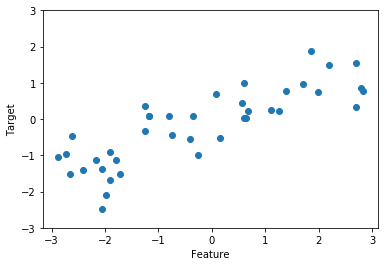

In [7]:
# Plot of the wave dataset, with the x-axis showing the feature and the y-axis showing the regression target
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

## Real-world Problem
We will also be using a real-world regression dataset, the Boston Housing dataset.The task associated with this dataset is to predict the median value of homes in several Boston neighborhoods in the 1970s ,using information such as crime rate, proximity to the Charles River, highway accessibility, and so on. The dataset contains 506
data points, described by 13 features

In [8]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape: {}".format(boston.data.shape))

Data shape: (506, 13)


For our purposes here, we will actually expand this dataset by not only considering these 13 measurements as input features, but also looking at all products (also called interactions) between features. In other words, we will not only consider crime rate and highway accessibility as features, but also the product of crime rate and highway accessibility. Including derived feature like these is called feature engineering

In [9]:
# Derived Dataset
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


The resulting 104 features are the 13 original features together with the 91 possible combinations of two features within those 13

## Using K-Nearest Neighbors Algorithm
The k-NN algorithm is arguably the simplest machine learning algorithm. Building the model consists only of storing the training dataset. To make a prediction for a new data point, the algorithm finds the closest data points in the training dataset—its
“nearest neighbors.”

### K-Neighbors classification
In its simplest version, the k-NN algorithm only considers exactly one nearest neighbor, which is the closest training data point to the point we want to make a prediction for.

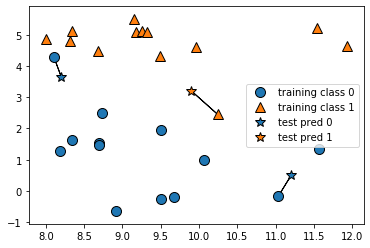

In [10]:
# Using one nearest neighbor
mglearn.plots.plot_knn_classification(n_neighbors=1)

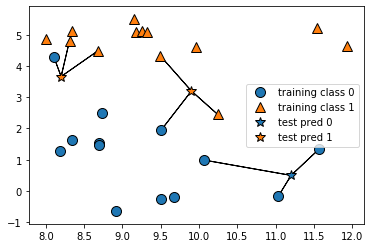

In [11]:
# Using three nearest neighbor
mglearn.plots.plot_knn_classification(n_neighbors=3)

## Applying K-Neighbors Classification on Example (Forge)

In [12]:
# Load and split the Data
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# Choose Algorithm
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
# Fit the model
clf.fit(X_train, y_train)
# Prediction
print("Test set predictions: {}".format(clf.predict(X_test)))
# check Accuracy
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set predictions: [1 0 1 0 1 0 0]
Test set accuracy: 0.86


## Analyzing KNeighborsClassifier

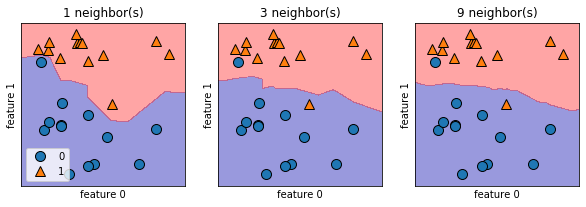

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

As you can see on the left in the figure, using a single neighbor results in a decision boundary that follows the training data closely. Considering more and more neighbors leads to a smoother decision boundary. A smoother boundary corresponds to a simpler model. In other words, using few neighbors corresponds to high model complexity

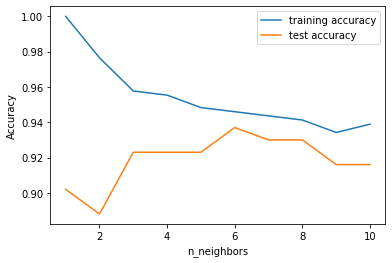

In [16]:
# connection between model complexity and generalization 
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=66)
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

### k-neighbors regression

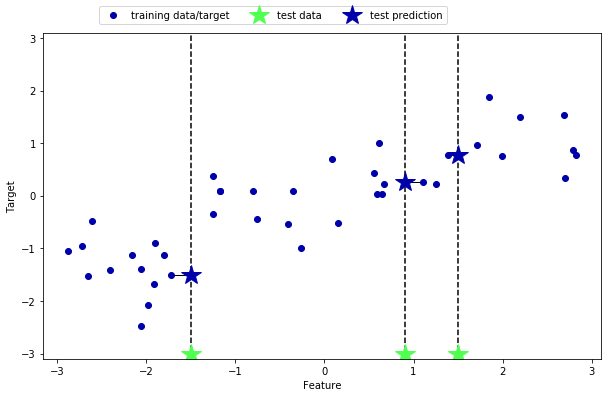

In [17]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

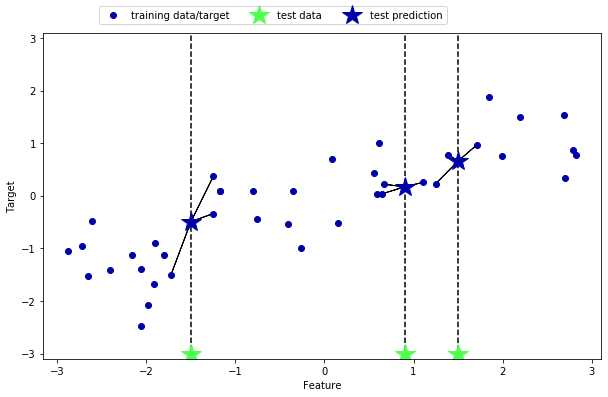

In [18]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

## Applying K-Neighbors Regression on Example (wave)

In [19]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)
# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets
reg.fit(X_train, y_train)

print("Test set predictions:\n{}".format(reg.predict(X_test)))
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
Test set R^2: 0.83


The R2 score, also known as the coefficient of determination, is a meas‐
ure of goodness of a prediction for a regression model, and yields a score between 0 and 1. A value of 1 corresponds to a perfect prediction, and a value of 0 corresponds to a constant model that just predicts the mean of the training set responses, y_train

## Analyzing KNeighborsRegressor

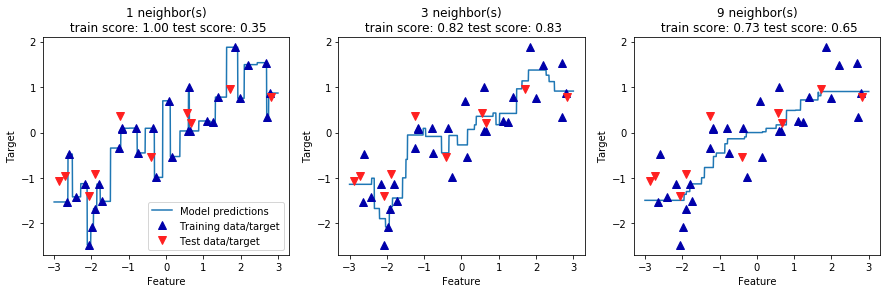

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title(
"{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
    n_neighbors, reg.score(X_train, y_train),
    reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
    
axes[0].legend(["Model predictions", "Training data/target",
"Test data/target"], loc="best")

As we can see from the plot, using only a single neighbor, each point in the training
set has an obvious influence on the predictions, and the predicted values go through
all of the data points. This leads to a very unsteady prediction. Considering more
neighbors leads to smoother predictions, but these do not fit the training data as well.

In principle, there are two important parameters to the KNeighbors classifier:
the number of neighbors and how you measure distance between data points. In practice, using a small number of neighbors like three or five often works well, but you should certainly adjust this parameter. Choosing the right distance measure is somewhat beyond the scope of this book. By default, Euclidean distance is used, which works well in many settings.

So, while the nearest k-neighbors algorithm is easy to understand, it is not often used in practice, due to prediction being slow and its inability to handle many features.

## Linear Models
Linear models make a prediction using a linear function of the input features
### Linear Models for Regression

ŷ = w[0\] * x[0\] + w[1\] * x[1\] + ... + w[p\] * x[p\] + b

where:

- x[0\] to x[p\] : features 
- p : Number of features
- w and b : parameters of the model that are learned 
- ŷ : The prediction

###  One Dimensional Dataset

Linear models for regression can be characterized as regression models for which the prediction is a line for a single feature, a plane when using two features, or a hyperplane in higher dimensions (that is, when using more features).

w[0]: 0.393906  b: -0.031804


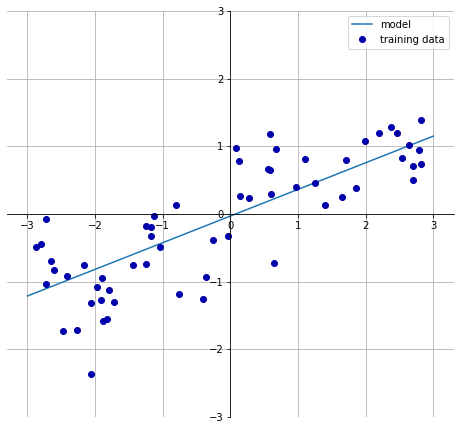

In [21]:
mglearn.plots.plot_linear_regression_wave()

There are many different linear models for regression. The difference between these models lies in how the model parameters w and b are learned from the training data, and how model complexity can be controlled.

If you compare the predictions made by the straight line with those made by the KNeighborsRegressor, using a straight line to make predictions seems very restrictive. It looks like all the fine details of the data are lost. In a sense, this is true. It is a strong (and somewhat unrealistic) assumption that our target y is a linear combination of the features. But looking at one-dimensional data gives a somewhat
skewed perspective. For datasets with many features, linear models can be very powerful. In particular, if you have more features than training data points, any target y can be perfectly modeled (on the training set) as a linear function

### Linear Regression (Ordinary Least squares)
the simplest and most classic linear method for regression. Linear regression finds the parameters w and b that minimize the mean squared error between predictions and the true regression targets, y,
on the training set. The mean squared error is the sum of the squared differences between the predictions and the true values. Linear regression has no parameters,which is a benefit, but it also has no way to control model complexity

In [24]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

# The “slope” parameters (w), also called weights or coefficients, are stored in the coef_attribute, while the offset or intercept (b) is stored in the intercept_ attribute
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))


lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


scikit-learn always stores anything that is derived from the training data in attributes that end with a trailing underscore. That is to separate them from parameters that are set by the user.

In [25]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


This means we are likely underfitting, not over‐
fitting. For this one-dimensional dataset, there is little danger of overfitting, as the model is very simple (or restricted). However, with higher-dimensional datasets (meaning datasets with a large number of features), linear models become more powerful, and there is a higher chance of overfitting

## Applying linearRegression on a Real-world Problem( Boston Housing )

In [27]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


This discrepancy between performance on the training set and the test set is a clear sign of overfitting.

SO we need to try a model that allow controlling the complexity
### Ridge Regression
